<a href="https://colab.research.google.com/github/dhiyaul10/PCVK_Ganjil_2025/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum**

In [2]:
## Langkah 1
from google.colab import drive
# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


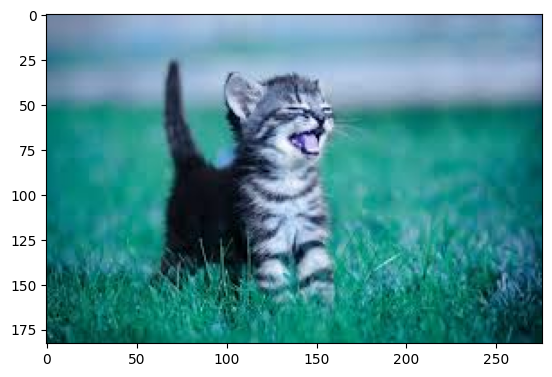

In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/Image PCVK/kitten01.jpeg')
plt.imshow(img)
# perhatikan hasilnya adalah citra dengan channel warna BGR

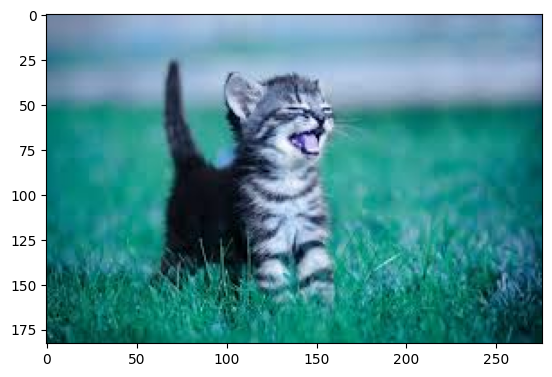

In [8]:
## Langkah 2
img2 = img
img3 = cv.cvtColor(img, cv.COLOR_BGR2RGB)  #konversi channel BGR -> RGB
plt.imshow(img3)

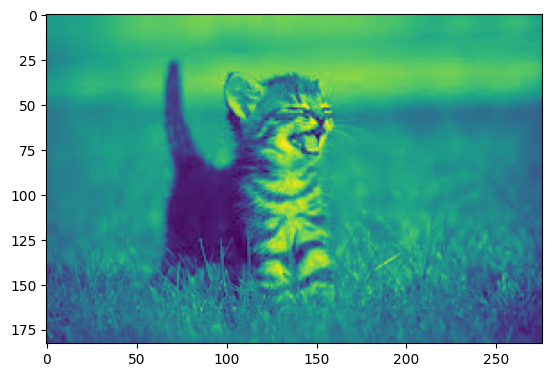

In [9]:
## Langkah 3
im_gray = cv.imread('/content/drive/MyDrive/Image PCVK/kitten01.jpeg', cv.IMREAD_GRAYSCALE)
plt.imshow(im_gray)

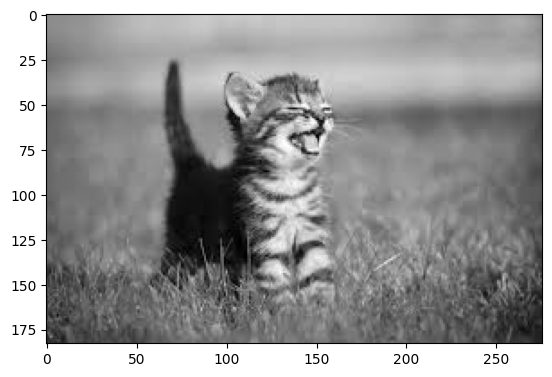

In [10]:
plt.imshow(im_gray, cmap='gray')

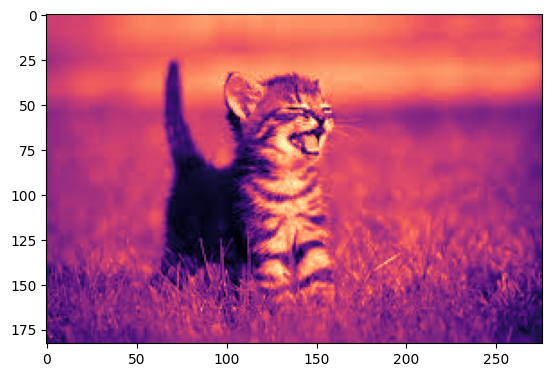

In [13]:
plt.imshow(im_gray, cmap='magma')

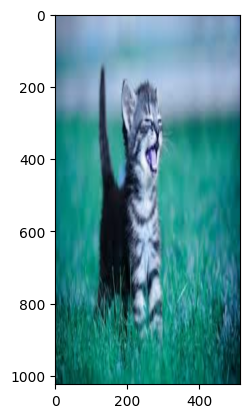

In [14]:
img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512, 1024))
plt.imshow(img4)

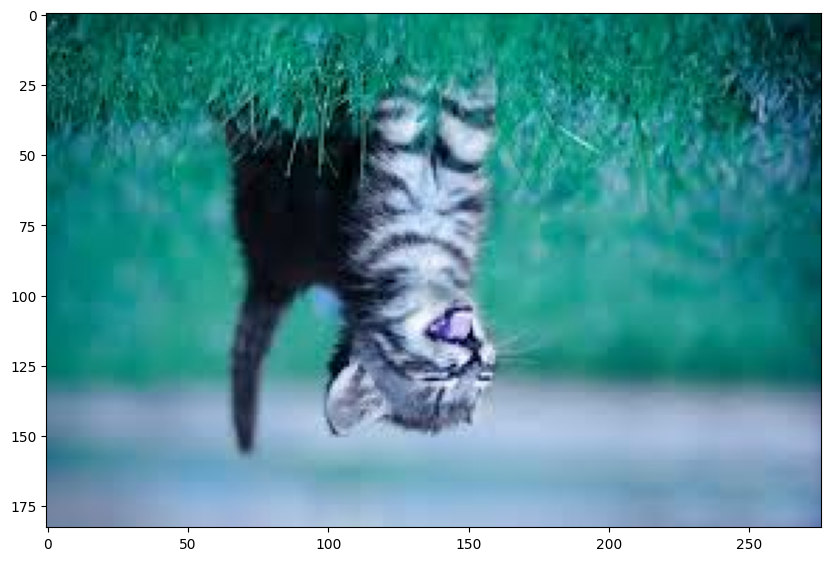

In [15]:
img5 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)

#simpan File image
#cv.imwrite('/content/drive/MyDrive/Image PCVK/kitten01.jpeg', img5)
#tampilkan plot dengan ukuran canvas yg lebih besar
fig = plt.figure(figsize=(10, 10))   #ubah-ubah ukuran (10,10) sesuai kebutuhan
ax = fig.add_subplot(111)
ax.imshow(img5)

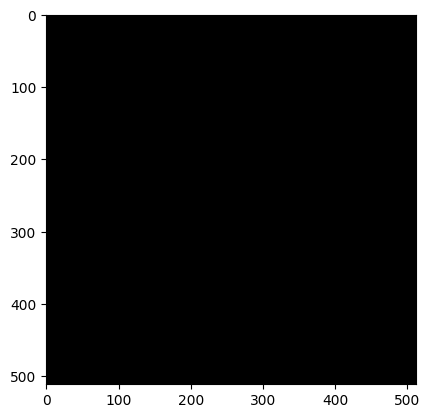

In [16]:
## Langkah 4
black_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)
plt.imshow(black_img)

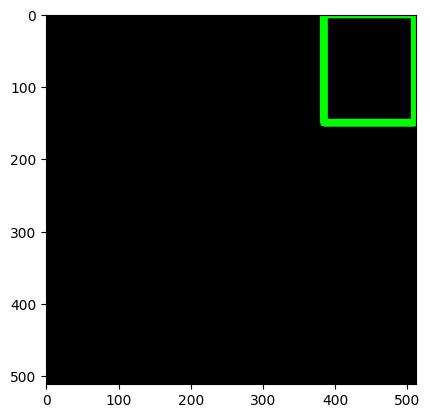

In [17]:
#perhatikan koordinat titik2 pt1 dan pt2
cv.rectangle(black_img, pt1=(384, 0), pt2=(510, 150), color=(0, 255, 0), thickness=10)
plt.imshow(black_img)

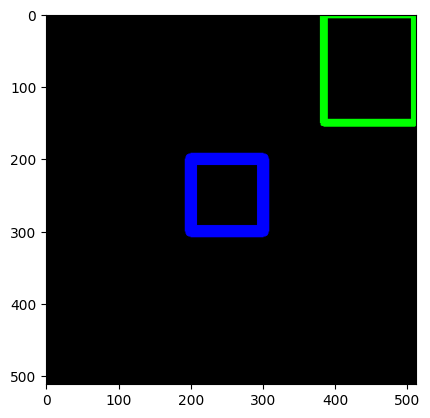

In [18]:
cv.rectangle(black_img, pt1=(200, 200), pt2=(300, 300), color=(0, 0, 255), thickness=15)
plt.imshow(black_img)

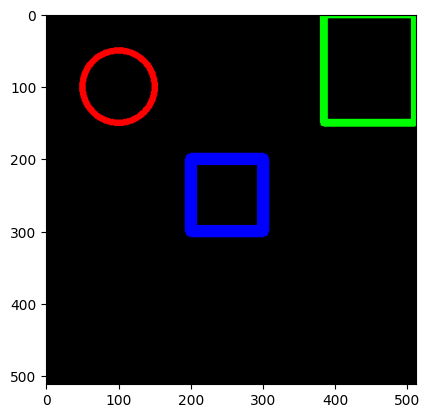

In [19]:
cv.circle(black_img, center=(100, 100), radius=50, color=(255, 0, 0), thickness=8)
plt.imshow(black_img)

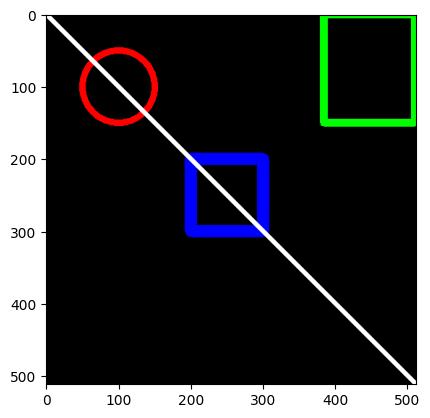

In [20]:
cv.line(black_img, pt1=(0, 0), pt2=(512, 512), color=(255, 255, 255), thickness=5)
plt.imshow(black_img)

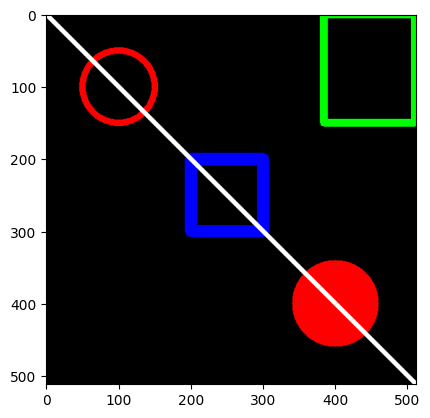

In [32]:
## Langkah 5
#Gambar hitam
black_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)

# Draw the rectangle in the top right corner (green)
cv.rectangle(black_img, pt1=(384, 0), pt2=(510, 150), color=(0, 255, 0), thickness=10)

# Draw the square in the center (blue)
cv.rectangle(black_img, pt1=(200, 200), pt2=(300, 300), color=(0, 0, 255), thickness=15)

# Draw the circle in the top left corner (red)
cv.circle(black_img, center=(100, 100), radius=50, color=(255, 0, 0), thickness=8)

# Draw the filled circle (red)
cv.circle(black_img, center=(400, 400), radius=60, color=(255, 0, 0), thickness=-1)

# Draw the diagonal line (white) last to ensure it's on top
cv.line(black_img, pt1=(0, 0), pt2=(512, 512), color=(255, 255, 255), thickness=5)


#menampilkan hasil
plt.imshow(black_img)
plt.show()

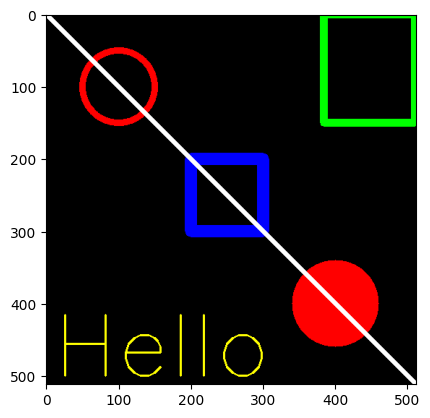

In [33]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img,text = 'Hello', org = (10, 500), fontFace = font, fontScale = 4, color = (255, 255, 0), thickness = 2, lineType = cv.LINE_AA)
plt.imshow(black_img)

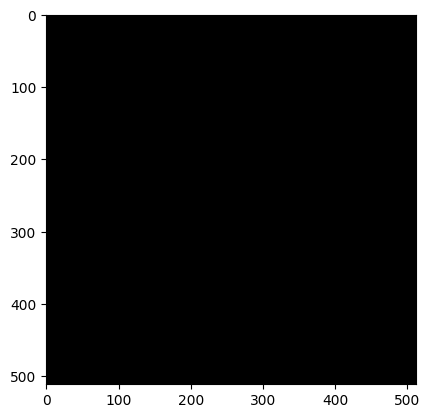

In [34]:
black_img2 = np.zeros(shape=(512, 512, 3), dtype=np.int32)
plt.imshow(black_img2)

In [35]:
vertices = np.array([[100, 300], [200, 200], [400, 300], [200, 400]], dtype=np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

In [36]:
pts = vertices.reshape((-1, 1, 2)) #nilai 2 untuk menunjukkan bahwa tiap ttik dibuat 3 channel yg mewakili R, G, dan B
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

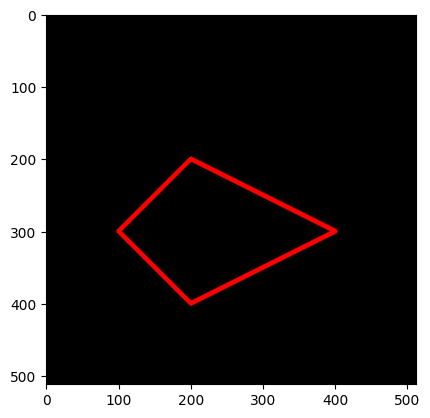

In [37]:
cv.polylines(black_img2, [pts], isClosed=True, color=(255, 0, 0), thickness=5)
plt.imshow(black_img2)

# **Pertanyaan**
1. Apakah perbedaan gambar yang ditampilkan tanpa dan dengan matplotlib?

**Jawab:**

- Tanpa matplotlib: biasanya ditampilkan dengan cv2.imshow() (OpenCV).
Citra akan muncul di jendela terpisah, menggunakan format warna BGR (Blue, Green, Red). Akibatnya, jika gambar sebenarnya berformat RGB, warnanya bisa terlihat tidak sesuai (misalnya merah jadi biru).

- Dengan matplotlib (plt.imshow()): gambar ditampilkan langsung di area notebook/jupyter/colab, dan matplotlib menggunakan format warna RGB. Karena itu tampilan warna lebih sesuai dengan gambar aslinya.

2. Apakah perbedaan dan pengaruhnya pembuatan black image antara tipe data int16
dan int32?

**Jawab:**

- int16: setiap pixel dapat menyimpan nilai dari −32.768 sampai 32.767.
- int32: setiap pixel dapat menyimpan nilai dari −2.147.483.648 sampai 2.147.483.647.
- Pengaruhnya untuk gambar hitam (black image), hasil awalnya sama (semua pixel bernilai nol). Saat dilakukan operasi gambar (misalnya menggambar garis, persegi, atau menambah intensitas pixel), penggunaan tipe data yang berbeda memengaruhi:
- Batas maksimum/minimum nilai pixel (overflow/underflow).
- Konsumsi memori (int32 lebih besar butuh lebih banyak RAM).
- Proses komputasi bisa lebih lambat pada tipe data yang lebih besar.

3. Apakah kegunaan “google.colab.patches import cv2_imshow” pada potongan kode
berikut:
from google.colab.patches import cv2_imshow
from skimage import io

**Jawab:**

- Fungsi cv2_imshow adalah versi pengganti cv2.imshow() khusus untuk Google Colab.
- Karena cv2.imshow() tidak bisa menampilkan jendela GUI di lingkungan Colab, cv2_imshow digunakan agar gambar bisa langsung ditampilkan di output notebook.

4. Apakah kegunaan “skimage import io” pada potongan kode soal nomor 3

**Jawab:**

io dari scikit-image (skimage) berfungsi untuk membaca (read) dan menulis (write) file citra. skimage.io lebih fleksibel dalam menangani berbagai format gambar dibanding hanya cv2.imread().

# **TUGAS**

1. Dengan menggunakan figsize, perhatikan apakah ukuran image pixelnya juga
berubah?

**Jawab:**

- figsize adalah parameter pada matplotlib (plt.figure(figsize=(w,h))) yang hanya mengubah ukuran tampilan gambar di layar/output notebook, bukan jumlah pixel asli gambar.
- Ukuran pixel citra (shape array NumPy) tetap sama, karena figsize hanya mengatur skala visualisasi.

2. Tampilkan image dalam channel Red-Blue dan Green-Blue saja!


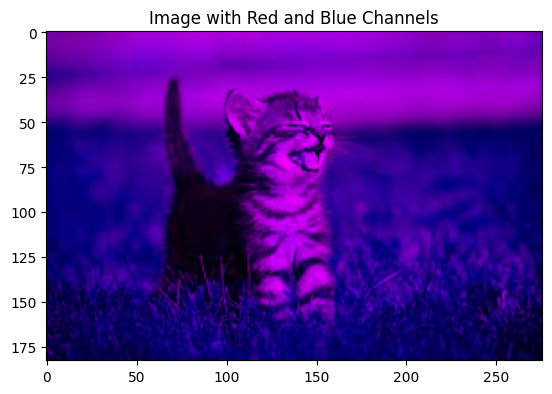

In [38]:
# Display image with only Red and Blue channels
img_rb = img3.copy()
img_rb[:, :, 1] = 0  # Set Green channel to 0

plt.imshow(img_rb)
plt.title("Image with Red and Blue Channels")
plt.show()

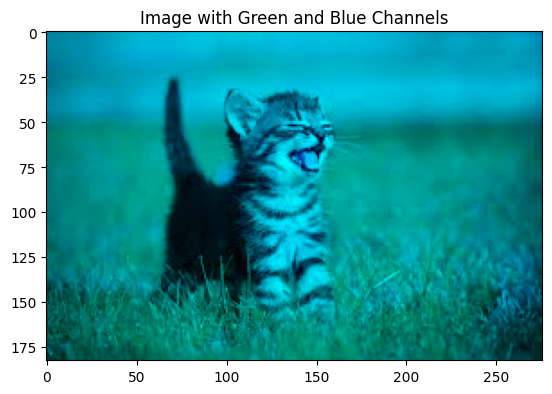

In [39]:
# Display image with only Green and Blue channels
img_gb = img3.copy()
img_gb[:, :, 0] = 0  # Set Red channel to 0

plt.imshow(img_gb)
plt.title("Image with Green and Blue Channels")
plt.show()

3. Tampilkan image baris ke 20-115, kolom 25-120!

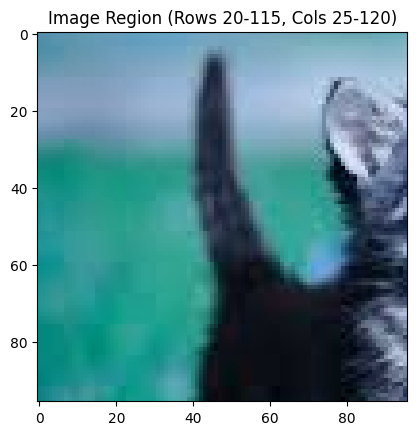

In [40]:
# Display the image region from row 20 to 115 and column 25 to 120
image_region = img3[20:116, 25:121]
plt.imshow(image_region)
plt.title("Image Region (Rows 20-115, Cols 25-120)")
plt.show()

4. Tampilkan image baris ke 5-30, semua kolom, channel Red saja!

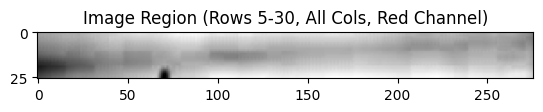

In [41]:
# Display image rows 5-30, all columns, Red channel only
image_red_channel = img3[5:31, :, 0]

plt.imshow(image_red_channel, cmap='gray')
plt.title("Image Region (Rows 5-30, All Cols, Red Channel)")
plt.show()

5. Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image.
disarankan menggunakan bilangan acak/random!

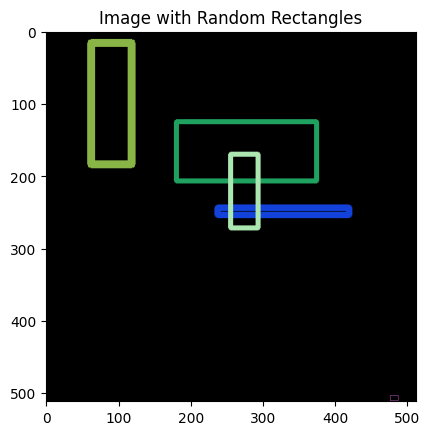

In [42]:
## Langkah 5 lanjutan - Membuat 5 kotak acak
# Create a black image
random_rect_img = np.zeros(shape=(512, 512, 3), dtype=np.uint8)

# Number of rectangles to draw
num_rectangles = 5

for _ in range(num_rectangles):
    # Generate random coordinates for the top-left corner
    x1 = np.random.randint(0, 512)
    y1 = np.random.randint(0, 512)

    # Generate random width and height (ensure they are within image bounds)
    width = np.random.randint(10, 200)
    height = np.random.randint(10, 200)
    x2 = min(x1 + width, 511)
    y2 = min(y1 + height, 511)

    # Generate random color (BGR format)
    color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))

    # Generate random thickness (-1 for filled, positive for outline)
    thickness = np.random.randint(-1, 10)

    # Draw the rectangle
    cv.rectangle(random_rect_img, pt1=(x1, y1), pt2=(x2, y2), color=color, thickness=thickness)

#menampilkan gambar
plt.imshow(cv.cvtColor(random_rect_img, cv.COLOR_BGR2RGB))
plt.title("Image with Random Rectangles")
plt.show()